# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

#sensor = pd.read_csv('../sub_1.csv')
#sensor.drop(columns=['Unnamed: 0'], inplace=True)
sensor = pd.read_csv('../sub_1.csv', index_col = 0)

Examine the data using the `head` function.

In [16]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [12]:
# Your code here:
sensor.isnull().sum()


attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [22]:
# Your code here:
sensor.shape
print(f"{sensor.shape[0]} rows / {sensor.shape[1]} columns" )

1751 rows / 12 columns


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [94]:
# Your code here:
sensor["date"] = pd.date_range(start = "1/1/2018 00:00:00", end = "1/1/2018 00:29:10", periods=sensor.shape[0])

Assign the time series index to the dataframe's index.

In [31]:
# Your code here:
sensor.index = sensor["date"]
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,date
date,,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [32]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

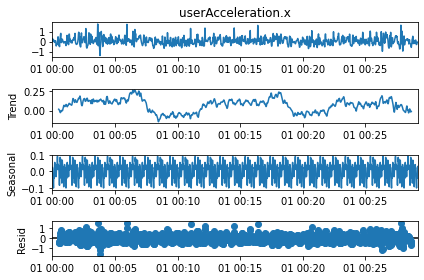

In [42]:
# Your code here:
res = seasonal_decompose(sensor['userAcceleration.x'], period = 60).plot()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

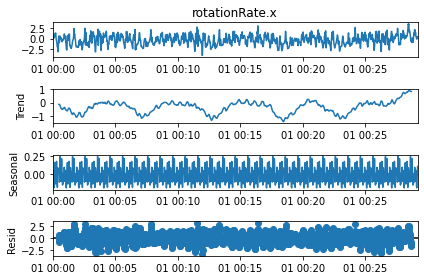

In [43]:
# Your code here:
res = seasonal_decompose(sensor['rotationRate.x'], period = 60).plot()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

**¿Qué es un lag plot?**

Lag plots are most commonly used to look for patterns in time series data.

A lag plot checks whether a data set or time series is random or not. Random data should not exhibit any identifiable structure in the lag plot. Non-random structure in the lag plot indicates that the underlying data are not random.

Data with autocorrelation gives rise to lag plots with linear patterns that follow the diagonal. As the level of
autocorrelation increases, the points cluster more tightly along the diagonal.


In [45]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

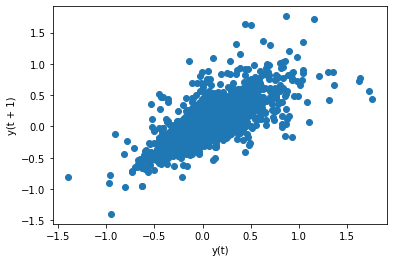

In [62]:
# Your code here:

#lag_plot(sensor['userAcceleration.x'].sample(500))
lag_plot(sensor['userAcceleration.x'], lag = 1)

Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

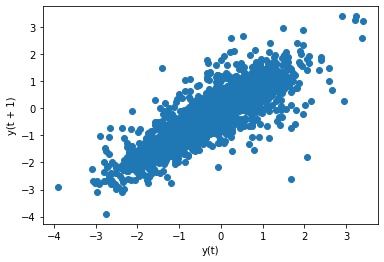

In [48]:
# Your code here:
lag_plot(sensor['rotationRate.x'])


What are your conclusions from both visualizations?

In [64]:
# Your conclusions here:
'''En los lag plots se ve un patrón lineal, lo que muestra que lo sdatos no son random, 
si no no que presentan autocorrelation.
''';

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [65]:
from statsmodels.tsa.stattools import adfuller

In [66]:
# Your code here:
X = sensor['userAcceleration.x']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -17.957994
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [67]:
# Your code here:
X = sensor['rotationRate.x']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -5.269861
p-value: 0.000006
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


What are your conclusions from this test?

In [70]:
# Your conclusions here:
'''
pvalue < 0.05.
ADF < 1% critical value

Rechazo la hipotesis nula (H0), el data no tiene unit root, es estacionario y por tanto 
no depende de una estructura temporal.
'''
;

''

##### Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

The parameters of the ARIMA model are defined as follows:

- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.

In [84]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
#AutoRegressive Integrated Moving Average

c:\users\ux533f\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
c:\users\ux533f\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
c:\users\ux533f\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:     userAcceleration.x   No. Observations:                 1751
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 207.553
Date:                Tue, 24 Nov 2020   AIC                           -409.106
Time:                        17:39:20   BIC                           -392.703
Sample:                    01-01-2018   HQIC                          -403.042
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4039      0.014     28.581      0.000       0.376       0.432
ar.L2         -0.3207      0.017    -18.739      0.000      -0.354      -0.287
sigma2         0.0462      0.001     51.710      0.0

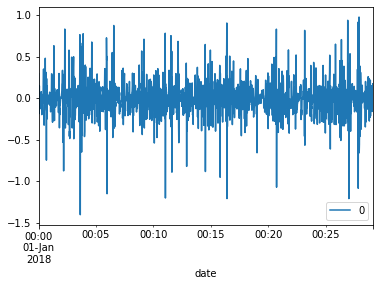

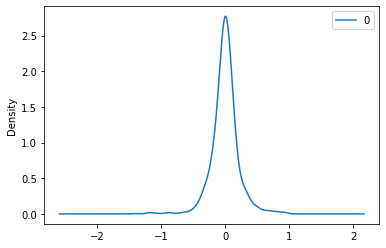

                 0
count  1751.000000
mean     -0.000032
std       0.215011
min      -1.402386
25%      -0.094244
50%       0.001198
75%       0.092819
max       0.977016


In [83]:
# Your code here:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

# fit model
model = ARIMA(sensor['userAcceleration.x'], order=(2,1,0))   # order= (p,q,d)
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=0.187165, expected=0.149749
predicted=0.117635, expected=0.038461
predicted=-0.009535, expected=-0.169175
predicted=-0.217328, expected=-0.300361
predicted=-0.286730, expected=-0.270174
predicted=-0.215863, expected=-0.268367
predicted=-0.277325, expected=-0.102444
predicted=-0.035980, expected=-0.085590
predicted=-0.132017, expected=-0.048105
predicted=-0.038368, expected=-0.065011
Test MSE: 0.008


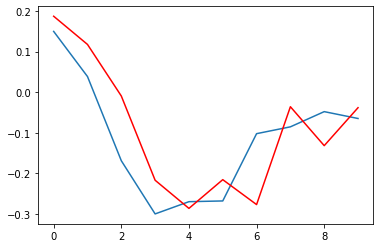

In [96]:
from sklearn.metrics import mean_squared_error

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
X = sensor['userAcceleration.x'].values

train, test = X[0:-10], X[-10:]
history = [x for x in train]
predictions = []
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,0))
	output = model.fit().forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
'''
The results show that there is a bias in the prediction (a non-zero mean in the residuals).

'''

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [16]:
# Your code here:
Test MSE: 0.008
ya estaba hecho arriba